Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
    
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки абонентская плата отсутствует; стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей; с подпиской Ultra абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.
    
Цель исследования:
1. Изучить данные для анализа и построения гипотез.
2. Проанализировать данные пользователей: частота встречаемости городов; соотношение пользователей с подпиской и без подписки; возраст пользователей; расстояние, которое пользователь преодолел за одну поездку; продолжительность поездок; а также  проанализировать данные для пользователей с подпиской и без о расстоянии и времени поездок и посчитать выручку.
3. Проверить следующие гипотезы: 
    
    3.1 Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 
    
    3.2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального износа самокатов. 
    
    3.3 Зарабатывает ли компания больше от пользователей с подпиской чем от пользователей без подписки. 
    
    3.4 Снизится ли количество обращений в техподдержку из-за того что обновили сервис серверов, с которыми взаимодействует мобильное приложение. 
    
Ход исследования:
    
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Объединение данных.
5. Подсчет выручки.
6. Проверка гипотез.    
7. Написание общего вывода. 

In [143]:
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import matplotlib.pyplot as plt

#### Шаг 1. Загрузка данных

In [144]:
# Загрузим датафрейм в переменную 'users'
users = pd.read_csv('/datasets/users_go.csv')

In [145]:
# Выведем первые строки набора данных
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [146]:
# Загрузим датафрейм в переменную 'rides'
rides = pd.read_csv('/datasets/rides_go.csv')

In [147]:
# Выведем первые строки набора данных
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [148]:
# Загрузим датафрейм в переменную 'subscriptions'
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [149]:
# Выведем первые строки набора данных
subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Считали CSV-файлы с данными с помощью библиотеки pandas и сохранили их в датафреймы. 

Users содержит:

user_id	уникальный идентификатор пользователя
name	имя пользователя
age	возраст
city	город
subscription_type	тип подписки (free, ultra)

Rides содержит:

user_id	уникальный идентификатор пользователя
distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date	дата совершения поездки

Subscriptions содержит:

subscription_type	тип подписки
minute_price	стоимость одной минуты поездки по данной подписке
start_ride_price	стоимость начала поездки
subscription_fee	стоимость ежемесячного платежа

#### Шаг 2. Предобработка данных

In [150]:
# Приведем столбец date к типу даты pandas
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')

In [151]:
rides['month'] = rides['date'].dt.month

In [152]:
# Проверьте наличие пропущенных значений и типы в датафреймах
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [153]:
# Выведем долю пропущенных значений для каждого столбца датафрейма
pd.DataFrame(users.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
user_id,0.0
name,0.0
age,0.0
city,0.0
subscription_type,0.0


In [154]:
# Выведем на экран только количество пропусков по столбцам
users.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

In [155]:
# Проверьте наличие пропущенных значений и типы в датафреймах
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [156]:
# Выведем долю пропущенных значений для каждого столбца датафрейма
pd.DataFrame(rides.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
user_id,0.0
distance,0.0
duration,0.0
date,0.0
month,0.0


In [157]:
# Выведем на экран только количество пропусков по столбцам
rides.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

In [158]:
# Проверьте наличие пропущенных значений и типы в датафреймах
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [159]:
# Проверим на дубликаты
users.duplicated().sum()

31

In [160]:
# удалим дубликаты
users = users.drop_duplicates()

In [161]:
# Проверим на дубликаты
rides.duplicated().sum()

0

In [162]:
rides['distance'] = rides['distance'].round(2)

In [163]:
rides['duration'] = np.ceil(rides['duration']) 

После изучения всех датафреймов, можно сказать что во всех датасетах отсудствуют пропуски. В таблице users Количество явных дубликатов в датасете: 31, которые мы удалили. В таблице subscriptions 2 строки, дубликатов и пропусков там нет. Привели столбец date к формату pandas. Округлили distance до 2-х знаков после запятой. Продолжительность каждой поездки округлена. Создали новый столбец с номером месяца на основе столбца date.

#### Шаг 3. Исследовательский анализ данных

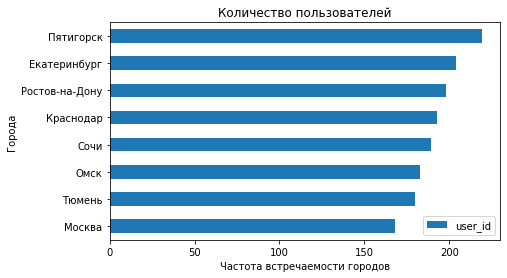

In [164]:
# частота встречаемости городов
city = users.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count').sort_values(by='user_id', ascending=True)
city.plot(kind='barh', figsize=(7, 4))
plt.title('Количество пользователей')
plt.xlabel('Частота встречаемости городов')
plt.ylabel('Города')
plt.show()

In [165]:
display(city.sort_values(by='user_id', ascending = False))

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Датафреймы содержат данные о пользователях из 8 городов, больше всего пользователей из Пятигорска, меньше всего из Москвы.

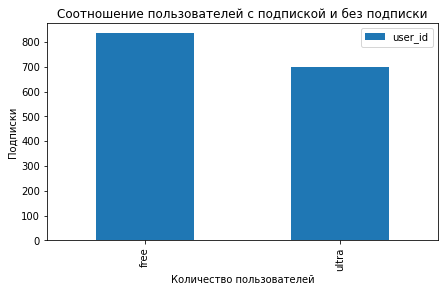

In [166]:
# соотношение пользователей с подпиской и без подписки
subscrib = users.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count')
subscrib.plot(kind='bar', figsize=(7, 4))
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('Количество пользователей')
plt.ylabel('Подписки')
plt.show()

In [187]:
subscribе = users.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count')  
subscribе

,user_id
subscription_type,
free,835
ultra,699


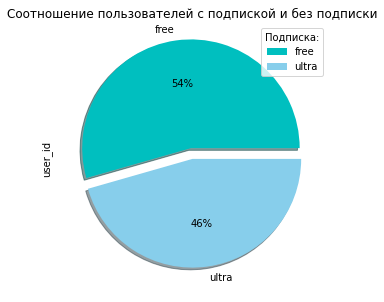

In [199]:
subscribе.plot.pie(y='user_id', figsize=(9,5), explode=[0.1, 0], colors = ['c', 'skyblue'], shadow = True, autopct='%1.0f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.legend(title = "Подписка:")
plt.show()

Пользователей без подписки больше чем больше чем пользователей с подпиской Ultra. Пользователей без подписки 54% и пользователей в подпиской 46% в общем числе пользователей. 

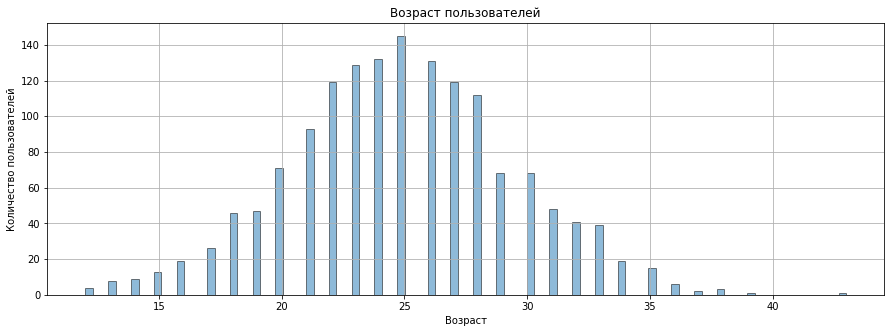

In [169]:
# возраст пользователей
users['age'].hist(bins=100, figsize=(15, 5), alpha = 0.5, edgecolor='black')
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

In [170]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Распределение возрастной кривой имеет нормальное распределение. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.

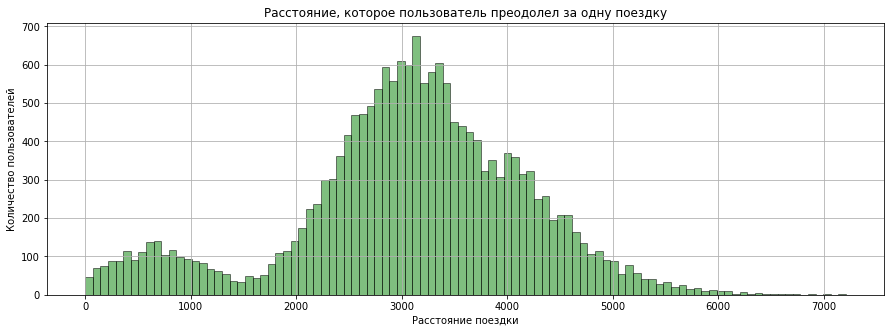

In [171]:
# расстояние, которое пользователь преодолел за одну поездку
rides['distance'].hist(bins=100, figsize=(15, 5), color='green', alpha = 0.5, edgecolor='black')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние поездки')
plt.ylabel('Количество пользователей')
plt.show()

In [172]:
rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

Расстояние, которое пользователи преодовают за одну поездку колеблется от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Самое частое преодолеваемое расстояние около 3200 метров, еще есть небольшой всплеск около 800 метров.

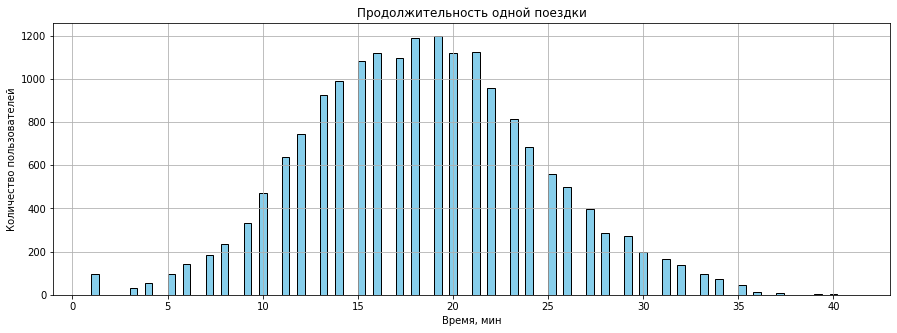

In [173]:
# продолжительность поездок 
rides['duration'].hist(bins=100, figsize=(15, 5), color='skyblue', edgecolor='black')
plt.title('Продолжительность одной поездки')
plt.xlabel('Время, мин')
plt.ylabel('Количество пользователей')
plt.show()

In [175]:
rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной, так и медианным значением.

Датафреймы содержат данные о пользователях из 8 городов, больше всего пользователей из Пятигорска, меньше всего из Москвы. Пользователей без подписки больше, чем больше чем пользователей с подпиской Ultra. Пользователей без подписки 54% от всех пользователей и пользователей в подпиской 46% в общем числе пользователей. Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Распределение возрастной кривой имеет нормальное распределение. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным. Расстояние, которое пользователи преодолевают за одну поездку колеблется от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Самое частое преодолеваемое расстояние около 3200 метров, еще есть небольшой всплеск около 800 метров.Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной, так и медианным значением.

#### Шаг 4. Объединение данных

In [176]:
rides.shape

(18068, 5)

In [177]:
subscriptions.shape

(2, 4)

In [178]:
# Объедините данные о пользователях, поездках и подписках в один датафрейм
df_all = users.merge(rides, on='user_id').merge(subscriptions, on='subscription_type')

In [179]:
df_all.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199


In [180]:
df_all.shape

(18068, 12)

In [181]:
# Создайте датафрейм c данными о пользователях без подписки
free = df_all[df_all['subscription_type'] == 'free']

In [182]:
free.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495284,17.890992,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173810,6.330250,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.860000,1.000000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.560000,13.000000,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.650000,18.000000,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.695000,22.000000,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.010000,35.000000,12.000000,8.0,50.0,0.0


In [183]:
free.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18.0,2021-02-14,2,8,50,0


In [184]:
# Создайте датафрейм с данными о пользователях с подпиской
ultra = df_all[df_all['subscription_type'] == 'ultra']

In [185]:
ultra.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199


In [186]:
ultra.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445431,19.037692,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895369,5.577439,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210000,4.000000,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.447500,15.000000,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.640000,19.000000,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.577500,22.000000,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.770000,41.000000,12.000000,6.0,0.0,199.0


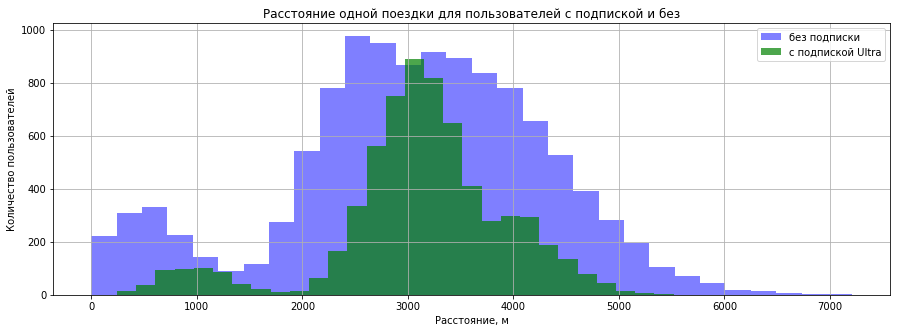

In [38]:
# Визуализируйте информацию о расстоянии для пользователей обеих категорий
free['distance'].plot(kind = 'hist', grid=True, figsize = (15,5), color='blue', alpha=0.5, bins = 30, label='без подписки')
ultra['distance'].plot(kind = 'hist', grid=True, figsize = (15,5), color='green', alpha=0.7, bins = 30, label='с подпиской Ultra')
plt.title('Расстояние одной поездки для пользователей с подпиской и без')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

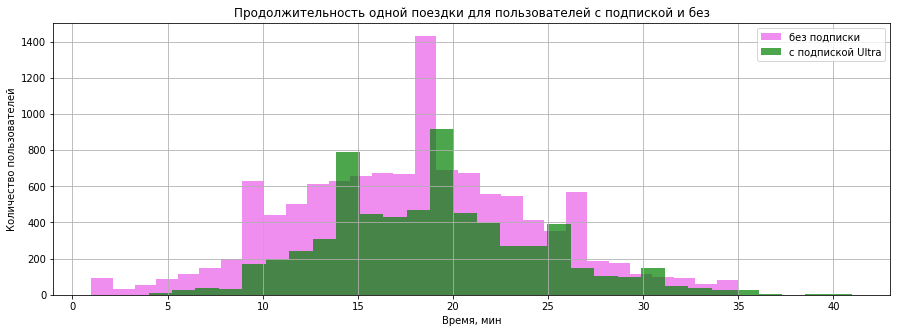

In [39]:
# Визуализируйте информацию о времени поездок для пользователей обеих категорий
free['duration'].plot(kind = 'hist', grid=True, figsize = (15,5), color='violet', alpha=0.9, bins = 30, label='без подписки')
ultra['duration'].plot(kind = 'hist', grid=True, figsize = (15,5), color='green', alpha=0.7, bins = 30, label='с подпиской Ultra')
plt.title('Продолжительность одной поездки для пользователей с подпиской и без')
plt.xlabel('Время, мин')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

Размер датасетов до объединения rides: 18068 строк и 5 столбцов, subscriptions: 2 строк и 4 столбцов. Объединили 2 датафрейма в один, после объединения размер общего датафрейма df_all: 18068 строк и 12 столбцов. Для дальнейшего анализа, создали еще два датафрейма с данными о пользователях с подпиской и без подписки. Поездок с использованием подписки ‘ultra’ составляет 11568, поездок, без подписки 6500. Выявлено, что с подпиской ultra минимальное время поездки 0.5 против 3.76 минут без подписки, а максимальное 34.95 против 40.83 мин. Также с подпиской ultra, минимальное расстояние поездки 244 против 0,86 м без подписки, а максимальное 5699 м с подпиской и максимальное значение без подписки 7211 метров. На графиках видим разницу в расстоянии и времени поездок в двух категориях пользователей. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. 

#### Шаг 5. Подсчёт выручки

In [133]:
# Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: 
# найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц
# каждое значение из столбца duration округляется с помощью «потолка»

df_all['duration'] = np.ceil(df_all['duration']) 
df_all['distance'] = df_all['distance'].round(2)

revenue = df_all.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)

revenue.columns = [
    'count', 'distance', 
    'duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee'
]


revenue.head(10)


count  distance  duration  minute_price  start_ride_price  \
user_id month                                                              
1       1          2   7027.51      42.0             6                 0   
        4          1    754.16       7.0             6                 0   
        8          2   6723.47      46.0             6                 0   
        10         2   5809.91      32.0             6                 0   
        11         3   7003.50      56.0             6                 0   
        12         2   6751.63      28.0             6                 0   
2       3          3  10187.73      63.0             6                 0   
        4          2   6164.39      40.0             6                 0   
        6          1   3255.34      14.0             6                 0   
        7          2   6780.73      48.0             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
        12                  199  
2       3                   199  
        4                   199  
        6                   199  
        7                   199

In [135]:
# Выведем на экран только количество пропусков по столбцам
revenue.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

In [136]:
# В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь

revenue['revenue'] = (
revenue['start_ride_price']*revenue['count']+
revenue['minute_price']*revenue['duration']+
revenue['subscription_fee'])

In [48]:
revenue.head(10)

count  distance  duration  minute_price  start_ride_price  \
user_id month                                                              
1       1          2   7027.51      42.0             6                 0   
        4          1    754.16       7.0             6                 0   
        8          2   6723.47      46.0             6                 0   
        10         2   5809.91      32.0             6                 0   
        11         3   7003.50      56.0             6                 0   
        12         2   6751.63      28.0             6                 0   
2       3          3  10187.73      63.0             6                 0   
        4          2   6164.39      40.0             6                 0   
        6          1   3255.34      14.0             6                 0   
        7          2   6780.73      48.0             6                 0   

               subscription_fee  revenue  
user_id month                             
1       1                   199    451.0  
        4                   199    241.0  
        8                   199    475.0  
        10                  199    391.0  
        11                  199    535.0  
        12                  199    367.0  
2       3                   199    577.0  
        4                   199    439.0  
        6                   199    283.0  
        7                   199    487.0

Добавили столбцы в датафрейм: для суммарного расстояния - distance, количества поездок - count и суммарного времени - duration
Для столбца с помесячной выручкой, которую принёс каждый пользователь добавили колонку revenue. 

#### Шаг 6. Проверка гипотез

Гипотеза 1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Выдвинем гипотезу:

Н0: Средняя продолжительность поездки с подпиской ultra и без free равна

Н1: Средняя продолжительность поездки с подпиской ultra больше продолжительности поездок без подписок free

In [43]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(ultra['duration'], free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Гипотеза 2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
    

Выдвинем гипотезу:

Н0: Среднее расстояние поездки с подпиской ultra равно 3130 метров.

Н1: Среднее расстояние поездки с подпиской ultra больше 3130 метров.

In [142]:
interested_value = 3130 # оптимальное с точки зрения износа самоката

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(ultra['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


Гипотеза 3 

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Выдвинем гипотезу:

Н0: Ежемесечная средняя выручка от пользователей с подпиской равна ежемесечная средней выручке от пользователей без подписки.

Н1: Ежемесечная средняя выручка от пользователей с подпиской больше ежемесечной средней выручки от пользователей без подписки.

In [141]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(revenue.loc[revenue['subscription_fee'] > 0, 'revenue'], 
                       revenue.loc[revenue['subscription_fee'] == 0, 'revenue'],alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Комментарии студента №1:</b> Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Если мы анализируем одну генеральную совокупность, с которой произошли некоторые изменения, в этом случае мы будем проверять, равны ли средние совокупности до и после этого изменения. Для этого можно использовать Гипотезу о равенстве средних для зависимых (парных) выборок. Выборки в этом случае будут зависимыми, иначе — парными. Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем примере это пара измерений для каждого пользователя — до и после изменения. Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок, применим метод scipy.stats.ttest_rel(). Ему достаточно передать всего два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения. 

- Гипотеза 1 Нулевая гипотеза отвергнута: средняя продолжительность поезки пользователей с подпиской больше продолжительности поездки пользователей без подписки
- Гипотеза 2 Нулевую гипотезу неудалось отвергнуть: средняя дистанция поездки пользователи с подпиской меньше 3130 метров.
- Гипотеза 3 Нулевая гипотеза отвергнута: средняя месячная выручка от пользователей с подпиской, больше средней месячной выручки от пользователей без подписки.
- Гипотеза 4: Чтобы проверить данные с которыми произошли изменения, в этом случае мы будем проверять, равны ли средние совокупности до и после этого изменения. Для этого можно использовать Гипотезу о равенстве средних для зависимых (парных) выборок, метод scipy.stats.ttest_rel(). Ему достаточно передать всего два параметра: наборы данных до и после.

# Общий Вывод

В процессе исследования было выполнено:

#  1. Загрузка данных:
Считали CSV-файлы с данными с помощью библиотеки pandas и сохранили их в датафреймы. 

Users содержит:

- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

Rides содержит:

- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

Subscriptions содержит:

- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

# 2. Выполнили предобработку данных и сделали следующие выводы:

После изучения всех датафреймов, можно сказать что во всех датасетах отсудствуют пропуски. В таблице users Количество явных дубликатов в датасете: 31, которые мы удалили. В таблице subscriptions 2 строки, дубликатов и пропусков там нет. Привели столбец date к формату pandas. Округлили distance до 2-х знаков после запятой. Продолжительность каждой поездки округлена. 
- Создали новый столбец с номером месяца на основе столбца date.


# 3. Провели исследовательский анализ данных.

**3.1 Частота встречаемости городов:**
Датафреймы содержат данные о пользователях из 8 городов, больше всего пользователей из Пятигорска, меньше всего из Москвы.

**3.2 Соотношение пользователей с подпиской и без подписки:**
Пользователей без подписки больше, чем больше чем пользователей с подпиской Ultra. Пользователей без подписки 54% от всех пользователей и пользователей в подпиской 46% в общем числе пользователей.  

**3.3 Возраст пользователей:**
Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Распределение возрастной кривой имеет нормальное распределение. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.

**3.4. Расстояние, которое пользователь преодолел за одну поездку:**
Расстояние, которое пользователи преодовают за одну поездку колеблется от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Самое частое преодолеваемое расстояние около 3200 метров, еще есть небольшой всплеск около 800 метров.  

**3.5 Продолжительность поездок:**
Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной, так и медианным значением.


# 4. Объединение данных

Размер датасетов до объединения rides: 18068 строк и 5 столбцов, subscriptions: 2 строк и 4 столбцов. Объединили 2 датафрейма в один, после объединения размер общего датафрейма df_all: 18068 строк и 12 столбцов. Для дальнейшего анализа, создали еще два датафрейма с данными о пользователях с подпиской и без подписки. Поездок с использованием подписки ‘ultra’ составляет 11568, поездок, без подписки 6500. Выявлено, что с подпиской ultra минимальное время поездки 0.5 против 3.76 минут без подписки, а максимальное 34.95 против 40.83 мин. Также с подпиской ultra, минимальное расстояние поездки 244 против 0,86 м без подписки, а максимальное 5699 м с подпиской и максимальное значение без подписки 7211 метров. На графиках видим разницу в расстоянии и времени поездок в двух категориях пользователей. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. 


# 5. Подсчёт выручки

**5.1 Создали датафрейм с агрегированными данными о поездках:**
- Добавили столбцы в датафрейм: для суммарного расстояния - distance, количества поездок - count и суммарное время - duration

**5.2 Помесечная выручка, которую принёс каждый пользователь:**
- Для столбца с помесячной выручкой, которую принёс каждый пользователь добавили колонку revenue. 



# 6. Проверка гипотез

**6.1 Гипотеза 1: среднее время поездки пользователей с подпиской и без:**
- Нулевая гипотеза отвергнута: средняя продолжительность поезки пользователей с подпиской больше продолжительности поездки пользователей без подписки

**6.2 Гипотеза 2: средняя дистанция поездки пользователей с подпиской и без:**
- Нулевую гипотезу неудалось отвергнуть: средняя дистанция поездки пользователи с подпиской меньше 3130 метров.

**6.3 Гипотеза 3: средняя выручка от пользователей с и без подписки:**
- Нулевая гипотеза отвергнута: средняя месячная выручка от пользователей с подпиской, больше средней месячной выручки от пользователей без подписки.

**6.4 Гипотеза 4: Какую гипотезу использовать при изменения данных:**
- Чтобы проверить данные с которыми произошли изменения, в этом случае мы будем проверять, равны ли средние совокупности до и после этого изменения. Для этого можно использовать Гипотезу о равенстве средних для зависимых (парных) выборок, метод scipy.stats.ttest_rel(). Ему достаточно передать всего два параметра: наборы данных до и после.